In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Ames_Housing_Sales.csv')

In [3]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [4]:
df.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [6]:
df.shape

(1379, 80)

In [7]:
str_col = list(df.dtypes[df.dtypes == np.object].index)
df_str_col = df.loc[:,str_col]
temp = df_str_col.apply(lambda x: x.nunique())
#temp = temp.apply(lambda x: len(x) -1 )
temp = temp -1
temp = temp[temp > 0]
cols_to_hot_encode = list(temp.index)
print("total number of additional colums ",  temp.sum())

total number of additional colums  215


In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction import DictVectorizer

In [9]:
dv = DictVectorizer(sparse=False)

In [10]:
df_col_enc = df_str_col[cols_to_hot_encode].copy()
oh = OneHotEncoder(sparse=False)

In [11]:
df_original = df.copy()
df = pd.get_dummies(df, columns=cols_to_hot_encode, drop_first=True)

In [12]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,0,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
target = df_original.SalePrice
colums_to_drop = list(df_original.dtypes[df_original.dtypes == np.object].index)
colums_to_drop.append("SalePrice")
features_or = df_original.drop(columns=colums_to_drop)
features = df.drop(columns="SalePrice")

In [15]:
train_x,test_x,train_y, test_y = train_test_split(features, target, test_size=0.3, random_state=42)
train_x_or, test_x_or, train_y_or, test_y_or = train_test_split(features_or, target, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr_or = LinearRegression()

In [25]:
lr.fit(train_x, train_y)
lr_or.fit(train_x_or, train_y_or)
print(r2_score(test_y, lr.predict(test_x)))
print(r2_score(test_y_or, lr_or.predict(test_x_or)))

-4098669339.1859035
0.7727012498677933


(55000.0, 600000.0)

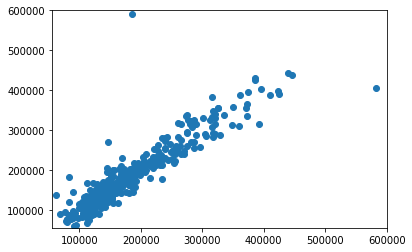

In [31]:

plt.scatter(test_y, lr.predict(test_x))
plt.ylim(55000,600000)
plt.xlim(55000,600000)


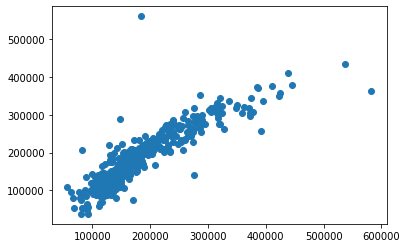

In [36]:
plt.scatter(test_y_or, lr_or.predict(test_x_or))
#plt.ylim(0,6000000)
#plt.xlim(0,6000000)